In [2]:
from sklearn.metrics import confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('heart.csv')


In [4]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [59]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [60]:
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [61]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


In [62]:
df['ChestPainType']

0      ATA
1      NAP
2      ATA
3      ASY
4      NAP
      ... 
913     TA
914    ASY
915    ASY
916    ATA
917    NAP
Name: ChestPainType, Length: 918, dtype: object

In [63]:
from sklearn.preprocessing import LabelEncoder

In [64]:
label_encoder =  LabelEncoder()

In [65]:
df['Sex'] = label_encoder.fit_transform(df['Sex'])

In [66]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,1,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,1,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,0,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [67]:
df['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [68]:
df['ExerciseAngina'] = label_encoder.fit_transform(df['ExerciseAngina'])

In [69]:
df['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [70]:
from sklearn.preprocessing import OrdinalEncoder

In [71]:
ordinal_encoder = OrdinalEncoder(categories=[['Down', 'Flat', 'Up']]) 

In [72]:
df['ST_Slope'] = ordinal_encoder.fit_transform(df[['ST_Slope']])

In [73]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,0,0.0,2.0,0
1,49,0,NAP,160,180,0,Normal,156,0,1.0,1.0,1
2,37,1,ATA,130,283,0,ST,98,0,0.0,2.0,0
3,48,0,ASY,138,214,0,Normal,108,1,1.5,1.0,1
4,54,1,NAP,150,195,0,Normal,122,0,0.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,TA,110,264,0,Normal,132,0,1.2,1.0,1
914,68,1,ASY,144,193,1,Normal,141,0,3.4,1.0,1
915,57,1,ASY,130,131,0,Normal,115,1,1.2,1.0,1
916,57,0,ATA,130,236,0,LVH,174,0,0.0,1.0,1


In [76]:
df=pd.get_dummies(df, columns=['ChestPainType'],drop_first=True)

In [77]:
df

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,1,140,289,0,Normal,172,0,0.0,2.0,0,True,False,False
1,49,0,160,180,0,Normal,156,0,1.0,1.0,1,False,True,False
2,37,1,130,283,0,ST,98,0,0.0,2.0,0,True,False,False
3,48,0,138,214,0,Normal,108,1,1.5,1.0,1,False,False,False
4,54,1,150,195,0,Normal,122,0,0.0,2.0,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,Normal,132,0,1.2,1.0,1,False,False,True
914,68,1,144,193,1,Normal,141,0,3.4,1.0,1,False,False,False
915,57,1,130,131,0,Normal,115,1,1.2,1.0,1,False,False,False
916,57,0,130,236,0,LVH,174,0,0.0,1.0,1,True,False,False


In [78]:
boolean_columns = ['ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA']

for col in boolean_columns:
    df[col] = df[col].astype(int)

In [79]:
df

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,1,140,289,0,Normal,172,0,0.0,2.0,0,1,0,0
1,49,0,160,180,0,Normal,156,0,1.0,1.0,1,0,1,0
2,37,1,130,283,0,ST,98,0,0.0,2.0,0,1,0,0
3,48,0,138,214,0,Normal,108,1,1.5,1.0,1,0,0,0
4,54,1,150,195,0,Normal,122,0,0.0,2.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,Normal,132,0,1.2,1.0,1,0,0,1
914,68,1,144,193,1,Normal,141,0,3.4,1.0,1,0,0,0
915,57,1,130,131,0,Normal,115,1,1.2,1.0,1,0,0,0
916,57,0,130,236,0,LVH,174,0,0.0,1.0,1,1,0,0


In [80]:
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [81]:
df = pd.get_dummies(df,columns=['RestingECG'],drop_first=True)

In [82]:
df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST
0,40,1,140,289,0,172,0,0.0,2.0,0,1,0,0,True,False
1,49,0,160,180,0,156,0,1.0,1.0,1,0,1,0,True,False
2,37,1,130,283,0,98,0,0.0,2.0,0,1,0,0,False,True
3,48,0,138,214,0,108,1,1.5,1.0,1,0,0,0,True,False
4,54,1,150,195,0,122,0,0.0,2.0,0,0,1,0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,0,1.2,1.0,1,0,0,1,True,False
914,68,1,144,193,1,141,0,3.4,1.0,1,0,0,0,True,False
915,57,1,130,131,0,115,1,1.2,1.0,1,0,0,0,True,False
916,57,0,130,236,0,174,0,0.0,1.0,1,1,0,0,False,False


In [83]:
bc = ['RestingECG_Normal','RestingECG_ST']

In [84]:
for i in bc:
    df[i] = df[i].astype(int)

In [85]:
df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST
0,40,1,140,289,0,172,0,0.0,2.0,0,1,0,0,1,0
1,49,0,160,180,0,156,0,1.0,1.0,1,0,1,0,1,0
2,37,1,130,283,0,98,0,0.0,2.0,0,1,0,0,0,1
3,48,0,138,214,0,108,1,1.5,1.0,1,0,0,0,1,0
4,54,1,150,195,0,122,0,0.0,2.0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,0,1.2,1.0,1,0,0,1,1,0
914,68,1,144,193,1,141,0,3.4,1.0,1,0,0,0,1,0
915,57,1,130,131,0,115,1,1.2,1.0,1,0,0,0,1,0
916,57,0,130,236,0,174,0,0.0,1.0,1,1,0,0,0,0


In [86]:
scaler = StandardScaler()

In [87]:
x = df.drop(columns=['HeartDisease'],axis=1)

In [88]:
x

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST
0,40,1,140,289,0,172,0,0.0,2.0,1,0,0,1,0
1,49,0,160,180,0,156,0,1.0,1.0,0,1,0,1,0
2,37,1,130,283,0,98,0,0.0,2.0,1,0,0,0,1
3,48,0,138,214,0,108,1,1.5,1.0,0,0,0,1,0
4,54,1,150,195,0,122,0,0.0,2.0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,0,1.2,1.0,0,0,1,1,0
914,68,1,144,193,1,141,0,3.4,1.0,0,0,0,1,0
915,57,1,130,131,0,115,1,1.2,1.0,0,0,0,1,0
916,57,0,130,236,0,174,0,0.0,1.0,1,0,0,0,0


In [89]:
y = df['HeartDisease']

In [90]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [91]:
x_new= scaler.fit_transform(x)

In [92]:
x_train , x_test , y_train, y_test = train_test_split(x_new,y,test_size=0.2,random_state=42)

In [93]:
model = Sequential()

In [95]:
x_train.shape

(734, 14)

In [96]:
model.add(Dense(14,activation='relu',input_dim=14))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/Users/apple/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [112]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,115 (4.36 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 744 (2.91 KB)

In [97]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [98]:
early_stopping = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [100]:
history = model.fit(x_train,y_train,epochs=100,validation_split=0.2,callbacks=[early_stopping])

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5722 - loss: 0.6800 - val_accuracy: 0.7007 - val_loss: 0.6203
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7277 - loss: 0.6021 - val_accuracy: 0.7483 - val_loss: 0.5722
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7789 - loss: 0.5551 - val_accuracy: 0.7755 - val_loss: 0.5295
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8123 - loss: 0.4996 - val_accuracy: 0.7891 - val_loss: 0.4981
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8130 - loss: 0.4716 - val_accuracy: 0.8027 - val_loss: 0.4693
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8491 - loss: 0.4428 - val_accuracy: 0.8163 - val_loss: 0.4477
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8569 - loss: 0.4072 - val_accuracy: 0.8163 - val_loss: 0.4321
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8588 - loss: 0.3787 - val_accuracy: 0.8095 - v

In [102]:
y_prob = model.predict(x_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step


In [103]:
y_pred = np.where(y_prob>0.5,1,0)

In [104]:
y_pred

array([[0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
    

In [105]:
cm = confusion_matrix(y_pred,y_test)

In [106]:
cm

array([[66, 15],
       [11, 92]])

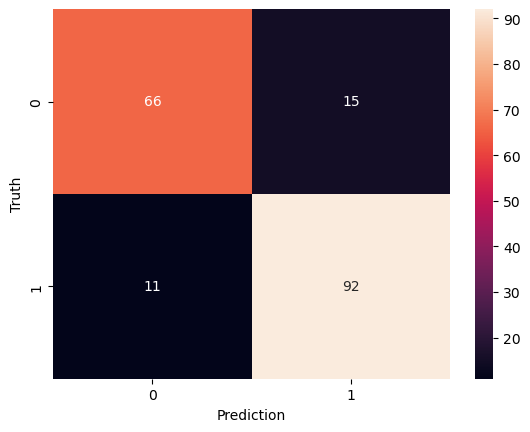

In [107]:
sns.heatmap(cm,annot=True)
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show()

In [108]:
accuracy_score(y_pred,y_test)

0.8586956521739131

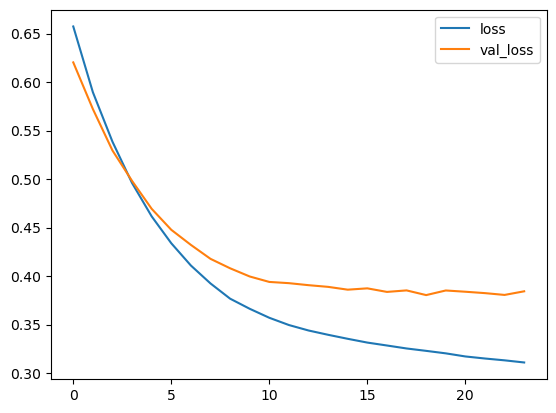

In [109]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

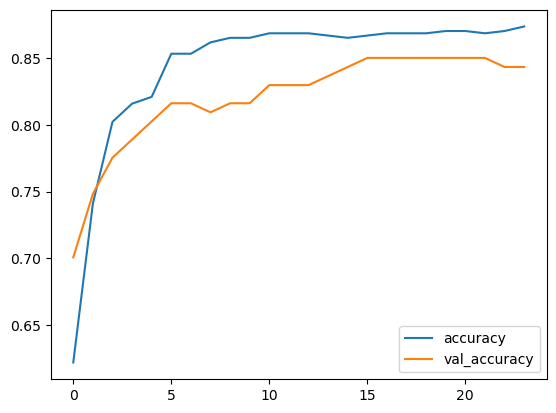

In [110]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()